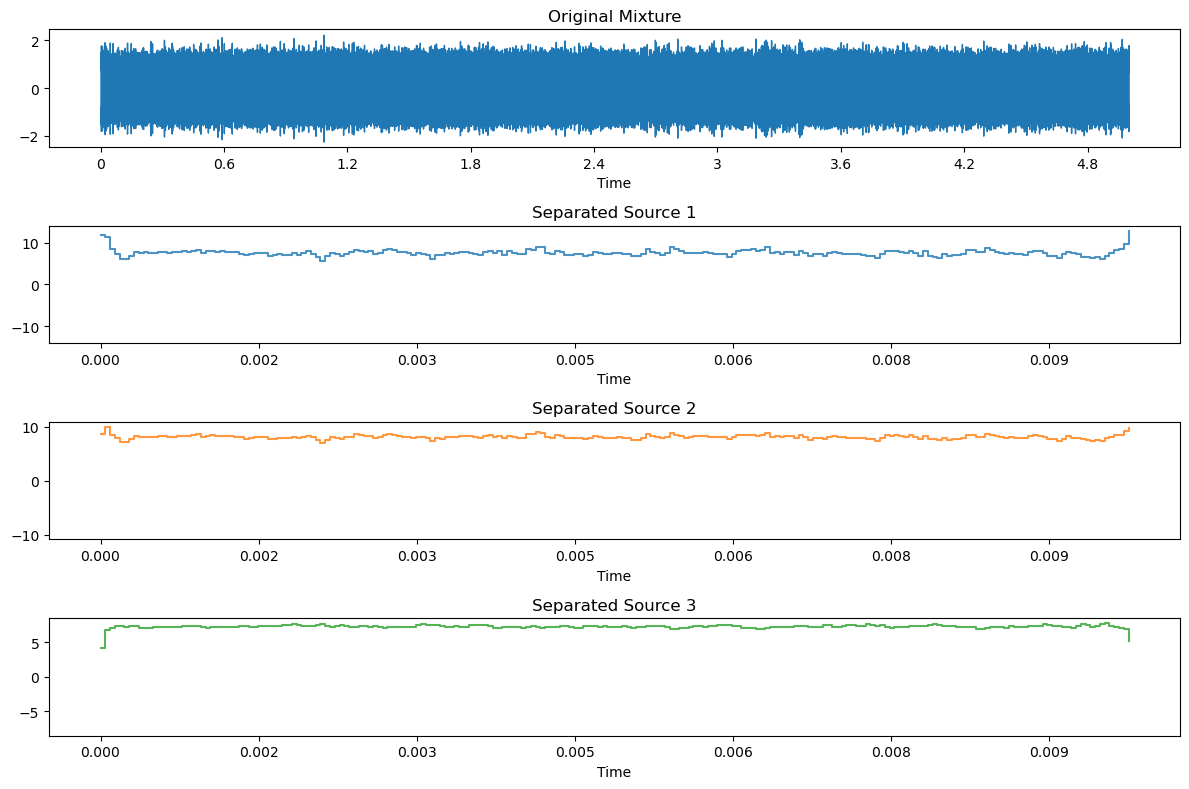

In [7]:
# Ignore all warnings
import warnings
warnings.filterwarnings('ignore')

import librosa
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import NMF

# Create synthetic audio signals with added noise
sr = 22050  # Sampling rate
duration = 5  # Duration in seconds

# Create three audio sources
source1 = 0.5 * np.sin(2 * np.pi * 440 * np.arange(0, duration * sr) / sr)
source2 = 0.7 * np.sin(2 * np.pi * 880 * np.arange(0, duration * sr) / sr)
source3 = 0.3 * np.random.randn(duration * sr)  # Add some random noise

# Create a mixture by adding the three sources
mixture = source1 + source2 + source3

# Short-time Fourier transform (STFT) to obtain spectrogram
S = np.abs(librosa.stft(mixture))

# Number of components to factorize
n_components = 3

# Apply NMF to the spectrogram
model = NMF(n_components=n_components, init='random', random_state=42)
W = model.fit_transform(S)
H = model.components_

# Reconstruct the separated sources
separated_sources = np.dot(W, H)

# Plot the original mixture, separated sources, and basis functions
plt.figure(figsize=(12, 8))

plt.subplot(4, 1, 1)
librosa.display.waveshow(mixture, sr=sr)
plt.title('Original Mixture')

for i in range(n_components):
    plt.subplot(4, 1, i + 2)
    librosa.display.waveshow(separated_sources[i], sr=sr, color='C'+str(i), alpha=0.8)
    plt.title(f'Separated Source {i + 1}')

plt.tight_layout()
plt.show()


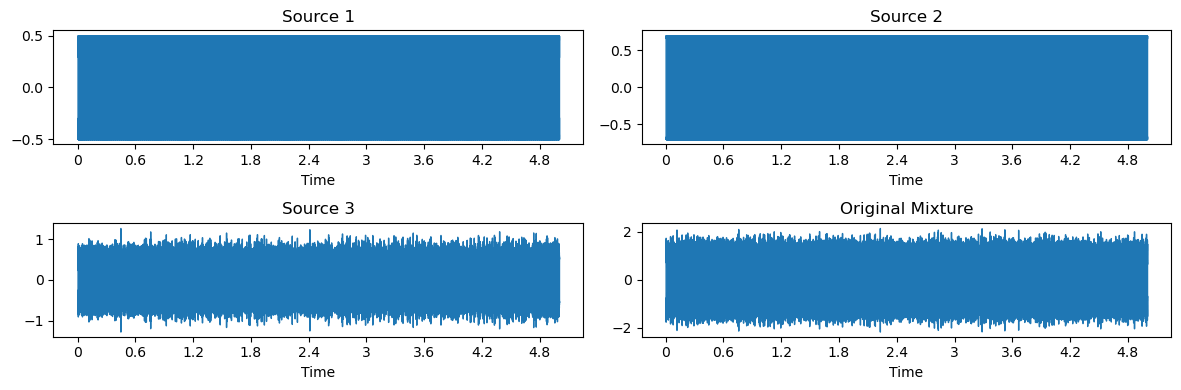

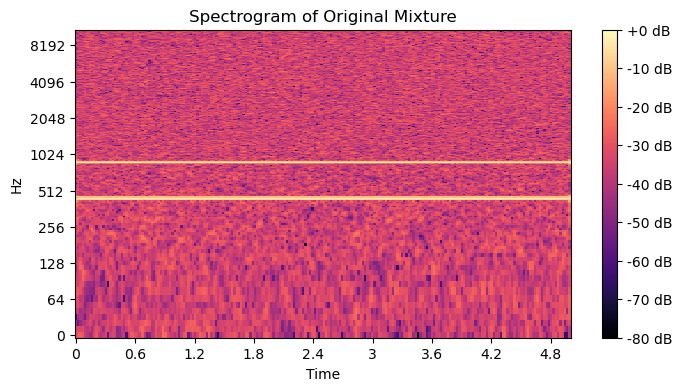

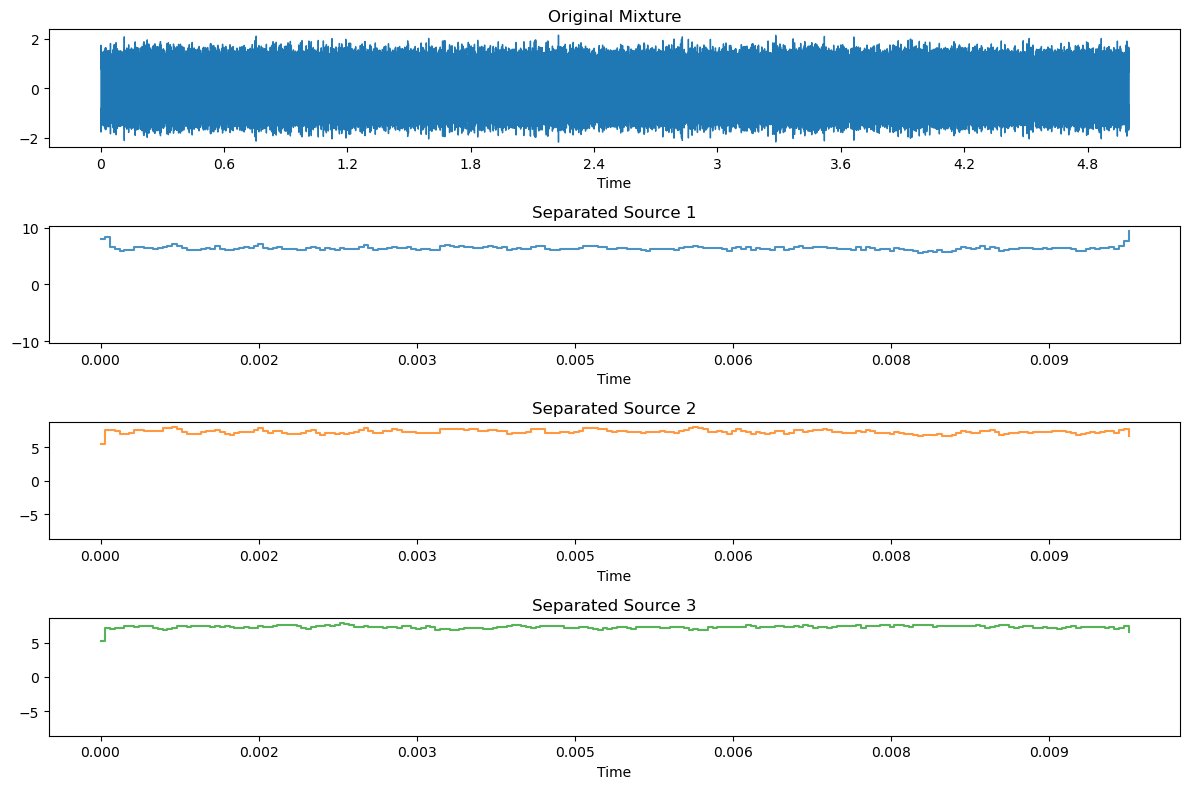

In [8]:
import librosa
import numpy as np
import matplotlib.pyplot as plt
import librosa.display
from sklearn.decomposition import NMF

# Create synthetic audio signals with added noise
sr = 22050  # Sampling rate
duration = 5  # Duration in seconds

# Create three audio sources
source1 = 0.5 * np.sin(2 * np.pi * 440 * np.arange(0, duration * sr) / sr)
source2 = 0.7 * np.sin(2 * np.pi * 880 * np.arange(0, duration * sr) / sr)
source3 = 0.3 * np.random.randn(duration * sr)  # Add some random noise

# Create a mixture by adding the three sources
mixture = source1 + source2 + source3

# Visualize the original sources and mixture
plt.figure(figsize=(12, 4))

plt.subplot(2, 2, 1)
librosa.display.waveshow(source1, sr=sr)
plt.title('Source 1')

plt.subplot(2, 2, 2)
librosa.display.waveshow(source2, sr=sr)
plt.title('Source 2')

plt.subplot(2, 2, 3)
librosa.display.waveshow(source3, sr=sr)
plt.title('Source 3')

plt.subplot(2, 2, 4)
librosa.display.waveshow(mixture, sr=sr)
plt.title('Original Mixture')

plt.tight_layout()
plt.show()

# Short-time Fourier transform (STFT) to obtain spectrogram
S = np.abs(librosa.stft(mixture))

# Visualize the spectrogram of the mixture
plt.figure(figsize=(8, 4))
librosa.display.specshow(librosa.amplitude_to_db(S, ref=np.max), sr=sr, y_axis='log', x_axis='time')
plt.colorbar(format='%+2.0f dB')
plt.title('Spectrogram of Original Mixture')
plt.show()

# Number of components to factorize
n_components = 3

# Apply NMF to the spectrogram
model = NMF(n_components=n_components, init='random', random_state=42)
W = model.fit_transform(S)
H = model.components_

# Reconstruct the separated sources
separated_sources = np.dot(W, H)

# Plot the original mixture, separated sources, and basis functions
plt.figure(figsize=(12, 8))

plt.subplot(4, 1, 1)
librosa.display.waveshow(mixture, sr=sr)
plt.title('Original Mixture')

for i in range(n_components):
    plt.subplot(4, 1, i + 2)
    librosa.display.waveshow(separated_sources[i], sr=sr, color='C'+str(i), alpha=0.8)
    plt.title(f'Separated Source {i + 1}')

plt.tight_layout()
plt.show()
